# 1. Create pipeline to preprocess the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# encode the class label
X = df.iloc[:,2:]
y = df.iloc[:,1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# partitioning the dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# combining transformers and estimators in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components = 4)), ('clf', LogisticRegression(random_state = 1))])
'''
Here in the pipeline, we used PCA to reduce the dimensionality so no need to use regulation in the LogisticRegression.
'''


pipe_lr.fit(X_train, y_train)
print('Test accuracy is: %.3f'% pipe_lr.score(X_test,y_test))


Test accuracy is: 0.965


# 2. Use cross-validation to assess model performance 

In [5]:
# use the following codes to evaluate the scores
'''
Note:

Default K value is 10
Increase K when dealing with small datasets
    - results in lower bias by averaging more individual model estimates
    - results in longer computation time
    - results in hihger variance since the training folds are more similar to each other
Decrease K when dealing with large datasets
    - mcuh faster

'''

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy scores: [ 0.93478261  0.93478261  0.95652174  0.91304348  1.          1.
  0.97777778  0.97777778  1.          0.95555556]
CV accuracy: 0.965 +/- 0.029


# 3. Debugging algorithms with learning and validation curves

### 3.1 Learning curves

In [6]:
# Use learning curves to debug the alg
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty = 'l2', random_state=0))])

train_sizes, train_scores, test_scores = learning_curve(estimator = pipe_lr, X=X_train,y=y_train, train_sizes=np.linspace(0.1,1,10), cv=10,n_jobs =1)
print('Training dataset size: ', X_train.shape)
train_scores

Training dataset size:  (455, 30)


array([[ 1.        ,  0.975     ,  0.975     ,  0.975     ,  0.975     ,
         0.975     ,  0.975     ,  0.975     ,  0.975     ,  0.975     ],
       [ 1.        ,  0.98765432,  0.98765432,  0.98765432,  0.98765432,
         0.98765432,  0.98765432,  0.98765432,  0.98765432,  0.98765432],
       [ 0.99180328,  0.98360656,  0.99180328,  0.99180328,  0.99180328,
         0.99180328,  0.99180328,  0.99180328,  0.99180328,  0.99180328],
       [ 0.99386503,  0.98773006,  0.98773006,  0.99386503,  0.98773006,
         0.98773006,  0.98773006,  0.98773006,  0.98773006,  0.98773006],
       [ 0.99509804,  0.99019608,  0.99019608,  0.99509804,  0.99019608,
         0.99019608,  0.99019608,  0.99019608,  0.99019608,  0.99019608],
       [ 0.99183673,  0.9877551 ,  0.99183673,  0.99183673,  0.99183673,
         0.99183673,  0.99183673,  0.99183673,  0.99183673,  0.99183673],
       [ 0.99300699,  0.99300699,  0.99300699,  0.99300699,  0.99300699,
         0.99300699,  0.99300699,  0.99300699

Mean traiing scores for each sample size: [ 0.9775      0.98888889  0.99098361  0.98895706  0.99117647  0.99142857
  0.99300699  0.99143731  0.99130435  0.99144254]


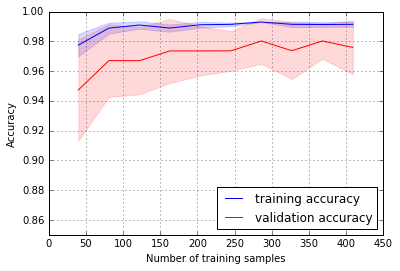

In [7]:
print('Mean traiing scores for each sample size:', np.mean(train_scores,axis =1))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'blue', label ='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'red', label ='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,alpha = 0.15, color = 'red')

plt.grid()
plt.legend(loc='lower right')
plt.ylim([0.85,1.0])
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()


##### Note: the above plot indicates a small overfitting due to the relative lower validation accuracy 

### 3.2 Validation curves

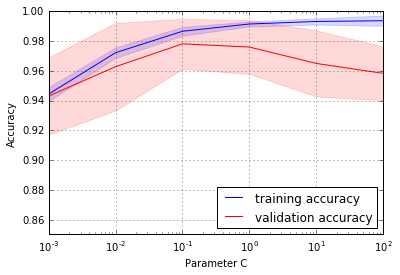

In [8]:
from sklearn.learning_curve import validation_curve
param_range = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(estimator = pipe_lr, X=X_train, y=y_train, param_name='clf__C',param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(param_range, train_mean, color = 'blue', label ='training accuracy')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std,alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, color = 'red', label ='validation accuracy')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std,alpha = 0.15, color = 'red')

plt.grid()
plt.legend(loc='lower right')
plt.ylim([0.85,1.0])
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.show()


##### Note: when C is small, the accuracy is low which means underfit; 
##### when C is large, the regulation strength is weak and there is a gap between training and validation. This means overfitting

# 4.Tuning model via grid search

In [9]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,]
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,scoring = 'accuracy', cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [10]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


##### 4.1 Select from different models with nested cross-validation

In [11]:
# Let's create another classifier using DecisionTree and compare it with SVM
from sklearn.tree import DecisionTreeClassifier
gs1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 0), param_grid = [{'max_depth': [1,2,3,4,5,6,7,None]}], scoring = 'accuracy', cv=5)


In [12]:
scores = cross_val_score(gs, X,y,cv=5, scoring = 'accuracy')
print('SVM CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

scores = cross_val_score(gs1, X,y,cv=5, scoring = 'accuracy')
print('Tree CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))



SVM CV accuracy: 0.972 +/- 0.012
Tree CV accuracy: 0.917 +/- 0.009


# 5. Other performance metrics - Precision, Recall and F1-score

In [13]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
confmat

array([[71,  1],
       [ 2, 40]])

In [15]:
# Precision, recall and F1 score
from sklearn.metrics import precision_score,f1_score, recall_score
print('Precision score: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall score: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1 score: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision score: 0.976
Recall score: 0.952
F1 score: 0.964


### 5.1 ROC curve